# Diabetes Diagnosis Prediction

The aim of this project is to develop a diagnostic prediction model for diabetes based on specific medical measurements. The dataset used in this project originates from the National Institute of Diabetes and Digestive and Kidney Diseases and is designed to determine whether a patient has diabetes or not. It is important to note that the dataset's selection criteria are stringent: all patients included are females who are at least 21 years old and of Pima Indian heritage.

The dataset consists of several variables, with some being independent or medical predictor variables, and only one being the target dependent variable known as "Outcome." The independent variables likely include factors such as glucose levels, insulin levels, BMI (Body Mass Index), blood pressure, and others that are relevant to diabetes diagnosis. These variables serve as input features for the predictive model.

The primary objective of this project is to leverage these medical measurements to build a machine learning model that can accurately predict whether a patient has diabetes. Such a model can have significant clinical implications by assisting healthcare professionals in early diagnosis and intervention for individuals at risk of diabetes, especially among the Pima Indian female population aged 21 and older. Overall, this project aims to contribute to better healthcare decision-making and patient outcomes in the context of diabetes management.

In [1]:
## import relevant libraries
##for numerical computation
import pandas as pd
import numpy as np
import scipy as spy
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
##for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plb

#for feature engineering and data preprocessing
from sklearn.preprocessing import StandardScaler

# Set the style for Seaborn plots (optional)
sns.set(style="whitegrid")

from scipy import stats


scaler = StandardScaler()

In [3]:
## read out the dataset
data = pd.read_csv(r"D:\\DATA ANALYTICS\\Diabetes prediction project\\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
##Splitting the dataset into train_test set
##verifying the shape of the dataset
data.shape

(768, 9)

In [5]:
#using the splitting ratio 70%:30% for the splitting to train and test
#TRAIN = [537,9]
#TEST = [231,9]
train = data.loc[:536,:]
test = data.loc[537:,:]

##view the splitted dataset shape
print(train.shape, test.shape)

(537, 9) (231, 9)


In [6]:
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
532,1,86,66,52,65,41.3,0.917,29,0
533,6,91,0,0,0,29.8,0.501,31,0
534,1,77,56,30,56,33.3,1.251,24,0
535,4,132,0,0,0,32.9,0.302,23,1


In [7]:
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
537,0,57,60,0,0,21.7,0.735,67,0
538,0,127,80,37,210,36.3,0.804,23,0
539,3,129,92,49,155,36.4,0.968,32,1
540,8,100,74,40,215,39.4,0.661,43,1
541,3,128,72,25,190,32.4,0.549,27,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
train.columns, test.columns

(Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
       dtype='object'),
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
       dtype='object'))

In [9]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               537 non-null    int64  
 1   Glucose                   537 non-null    int64  
 2   BloodPressure             537 non-null    int64  
 3   SkinThickness             537 non-null    int64  
 4   Insulin                   537 non-null    int64  
 5   BMI                       537 non-null    float64
 6   DiabetesPedigreeFunction  537 non-null    float64
 7   Age                       537 non-null    int64  
 8   Outcome                   537 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 37.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 537 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies        

(None, None)

In [10]:
train.describe(), test.describe()

(       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   537.000000  537.000000     537.000000     537.000000  537.000000   
 mean      3.824953  120.374302      68.484171      20.299814   79.113594   
 std       3.358978   32.535393      19.651256      15.695727  117.406442   
 min       0.000000    0.000000       0.000000       0.000000    0.000000   
 25%       1.000000   99.000000      64.000000       0.000000    0.000000   
 50%       3.000000  117.000000      70.000000      22.000000   36.000000   
 75%       6.000000  141.000000      80.000000      32.000000  120.000000   
 max      17.000000  197.000000     122.000000      63.000000  846.000000   
 
               BMI  DiabetesPedigreeFunction         Age     Outcome  
 count  537.000000                537.000000  537.000000  537.000000  
 mean    31.813594                  0.483272   33.085661    0.351955  
 std      8.190362                  0.340978   11.688754    0.478025  
 min      0.000000   

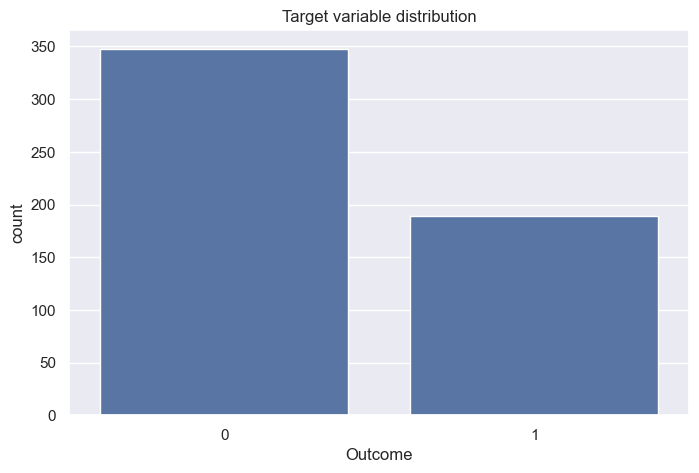

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(data=train, x="Outcome")
plt.title('Target variable distribution')
plt.show()

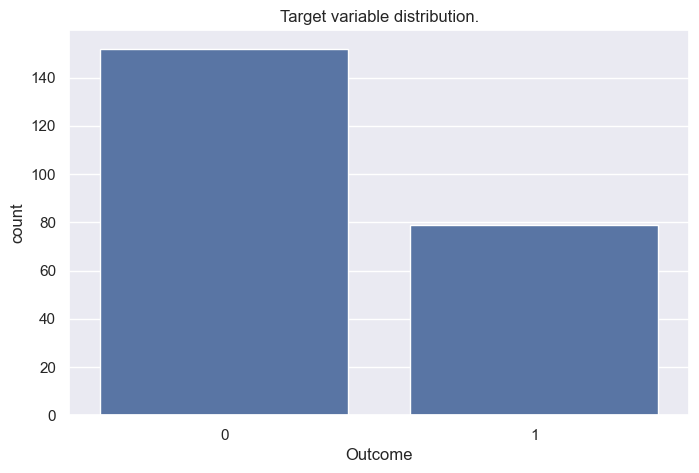

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(data=test, x="Outcome")
plt.title('Target variable distribution.')
plt.show()

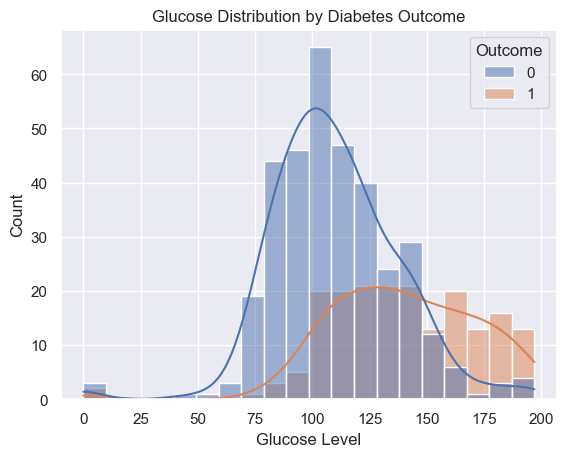

In [13]:
# Visualization 1: Histogram of Glucose by Outcome
sns.histplot(data=train, x="Glucose", hue="Outcome", bins=20, kde=True)
plt.title("Glucose Distribution by Diabetes Outcome")
plt.xlabel("Glucose Level")
plt.ylabel("Count")
plt.show()

Adults should generally have fasting blood glucose levels between 70 and 100 milligrams per deciliter (mg/dL). Since other factors like age, health, and pregnancy are also underlying causes for the growth of a person's glucose level above the normal range, people without diabetes have glucose levels that are closer to the range of 75 to 150 than to the range of normal.


Glucose levels in diabetics are typically between 100 and 200. This is a very strong indicator that each person's glucose level has a significant impact and relationship with their level of diabetes

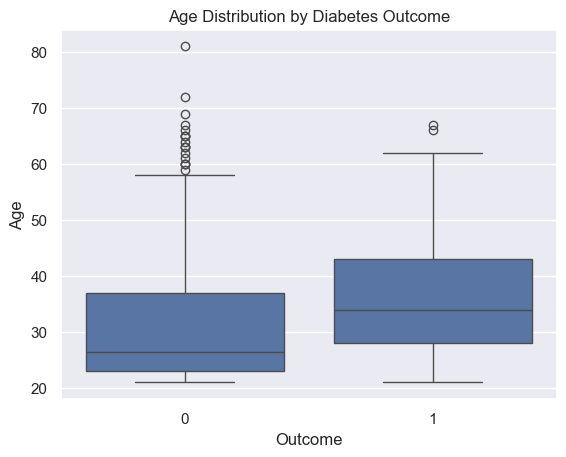

In [14]:
# Visualization 2: Box Plot of Age by Outcome
sns.boxplot(data=train, x="Outcome", y="Age")
plt.title("Age Distribution by Diabetes Outcome")
plt.xlabel("Outcome")
plt.ylabel("Age")
plt.show()

The difference between the mean ages of individuals with diabetes and those without it—34 versus 30, respectively—strongly suggests that as people age, their risk of developing diabetes rises.


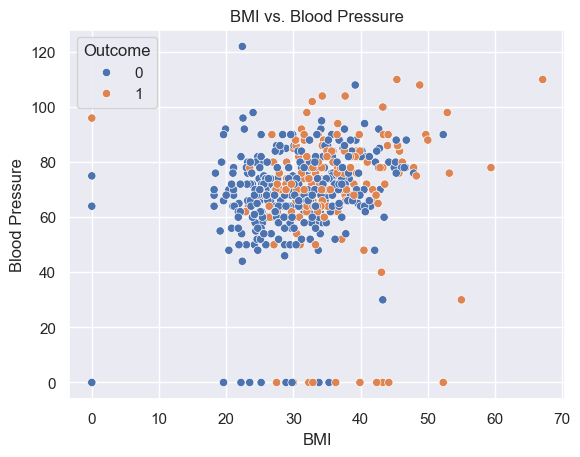

In [15]:
# Visualization 3: Scatter Plot of BMI vs. Blood Pressure
sns.scatterplot(data=train, x="BMI", y="BloodPressure", hue="Outcome")
plt.title("BMI vs. Blood Pressure")
plt.xlabel("BMI")
plt.ylabel("Blood Pressure")
plt.show()


Body mass index (BMI) is a measure of body fat based on height & weight that applies to adult men and women. It is calculated by dividing a person's weight in kilograms by the square of their height in meters.

The BMI ranges are as follows:

Underweight: BMI < 18.5
Normal weight: BMI 18.5 to 24.9
Overweight: BMI 25 to 29.9
Obese: BMI 30 or greater
It is observed that the BMI range for the Pima India Heritage is roughly between 25 - 42 with a mean value of 32.4. This suggest that most of individuals are Overweight or Obese accounting for a an high blood pressure since  fat cells produce substances that can narrow the blood vessels, making it harder for blood to flow. This can increase the pressure of the blood against the walls of the blood vessels.

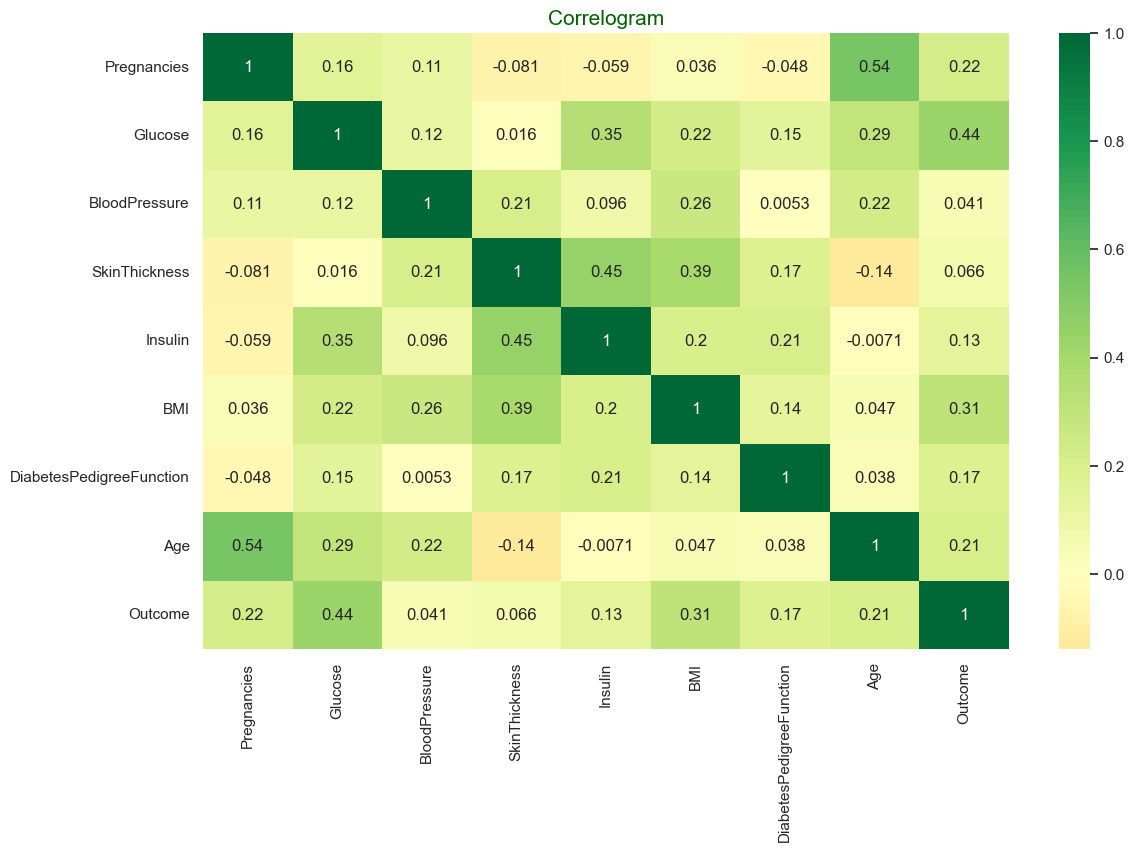

In [17]:
# Visualization 4: Correlation Heatmap
corr = train.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

The target column (OUTCOME) is positively correlated with all features (columns).Despite this, none of them are bigger than 0.5. But in the analytics, they are all predictors.

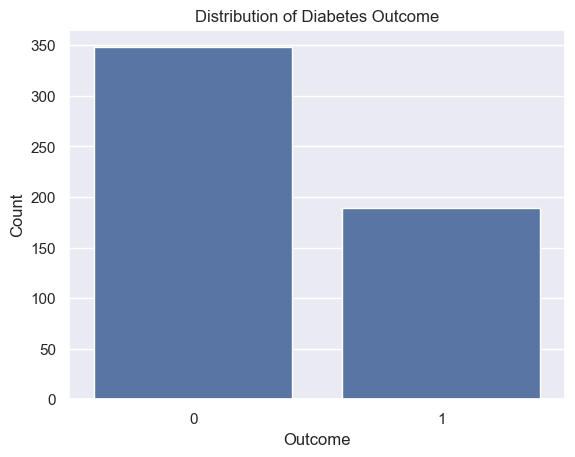

In [18]:
# Visualization 5: Bar Chart of Outcome Counts
sns.countplot(data=train, x="Outcome")
plt.title("Distribution of Diabetes Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

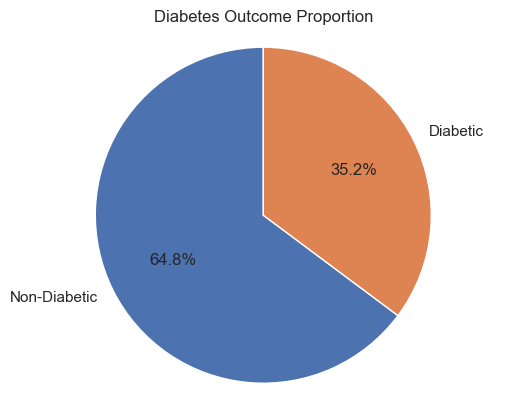

In [19]:
# Visualization 6: Pie Chart of Outcome Proportion
plt.pie(train["Outcome"].value_counts(), labels=["Non-Diabetic", "Diabetic"], autopct='%1.1f%%', startangle=90)
plt.title("Diabetes Outcome Proportion")
plt.axis('equal')
plt.show()

The majority of Pima India Heritage's female population does not have diabetes, with 35.2% being diagnosed with the disease. In this session, we will examine the diagnostic parameters' predictive value and how they affect an individual's likelihood of developing diabetes.


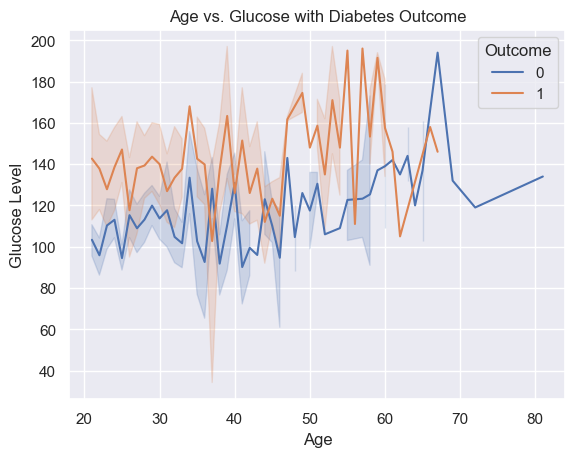

In [20]:
# Visualization 7: Line Plot of Age vs. Glucose
sns.lineplot(data=train, x="Age", y="Glucose", hue="Outcome")
plt.title("Age vs. Glucose with Diabetes Outcome")
plt.xlabel("Age")
plt.ylabel("Glucose Level")
plt.show()

In these women's diabetic conditions, the glucose level becomes a superlevel indication at 60 to 70 years of age.

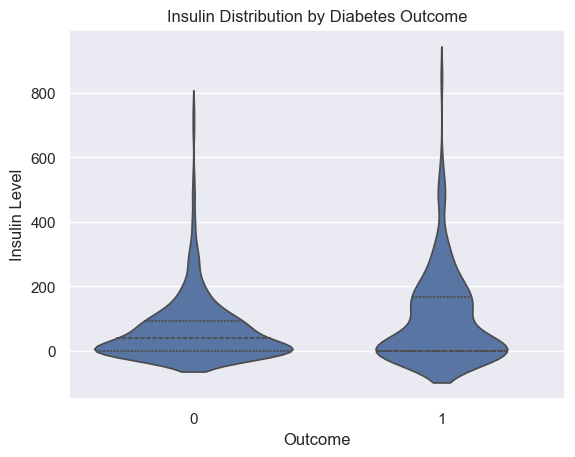

In [21]:
# Visualization 8: Violin Plot of Insulin by Outcome
sns.violinplot(data=train, x="Outcome", y="Insulin", inner="quart")
plt.title("Insulin Distribution by Diabetes Outcome")
plt.xlabel("Outcome")
plt.ylabel("Insulin Level")
plt.show()

Adults' fasting insulin levels normally vary from 5 to 15 micro International Units per milliliter (uIU/mL), regardless of gender or body size. This chart shows that the insulin levels for the study's female participants ranged from 0 to 50. Keep in mind that the range for women with diabetes is slightly narrower than for those without diabetes. This demonstrates how insulin affects determining if women of Pima Indian descent are diabetes.

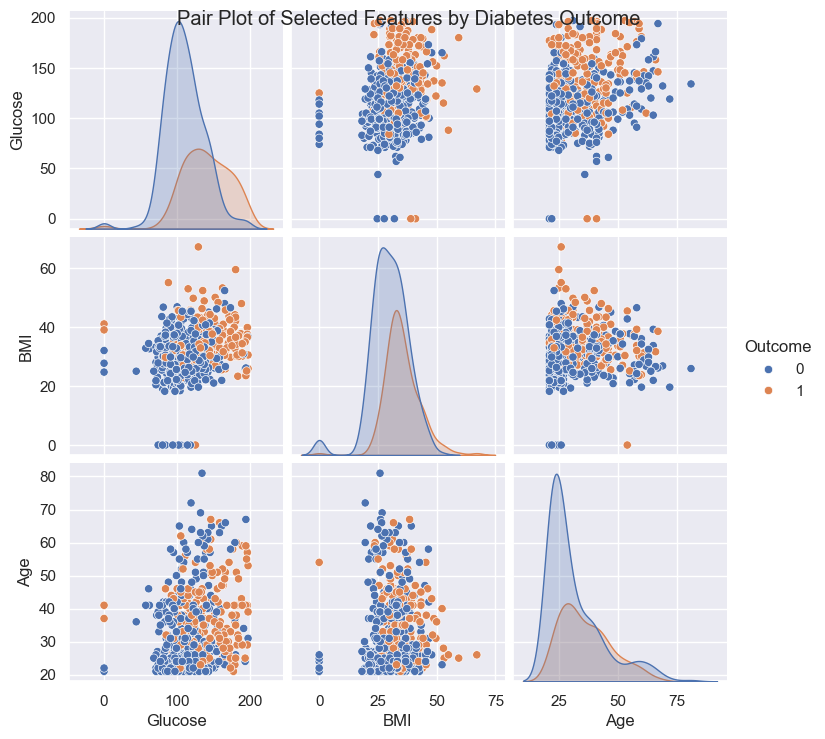

In [22]:
# Visualization 9: Pair Plot of Selected Features
sns.pairplot(train[['Glucose', 'BMI', 'Age', 'Outcome']], hue="Outcome")
plt.suptitle("Pair Plot of Selected Features by Diabetes Outcome")
plt.show()

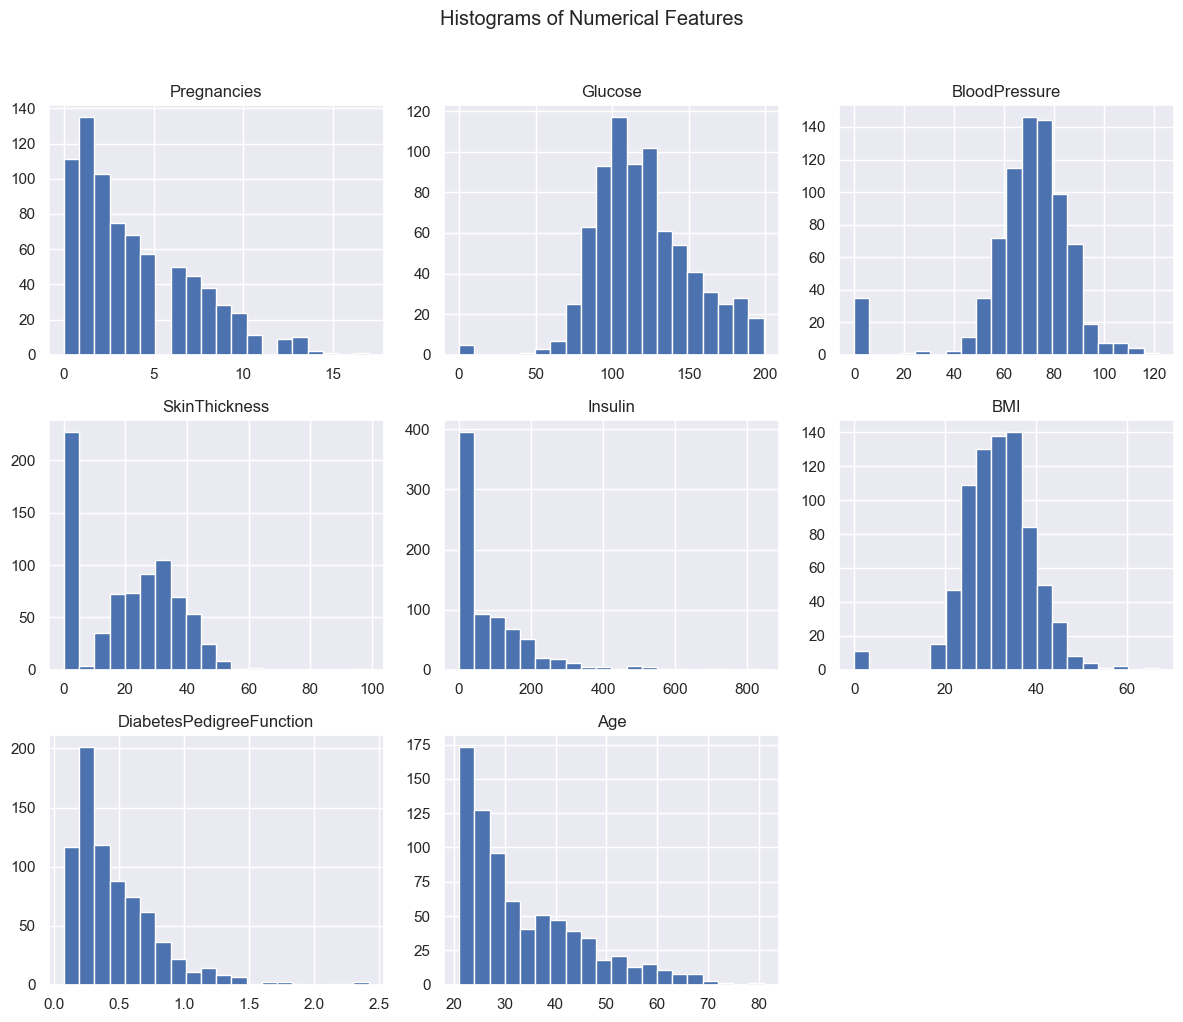

In [23]:
data.drop("Outcome", axis=1).hist(bins=20, figsize=(12, 10))
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()

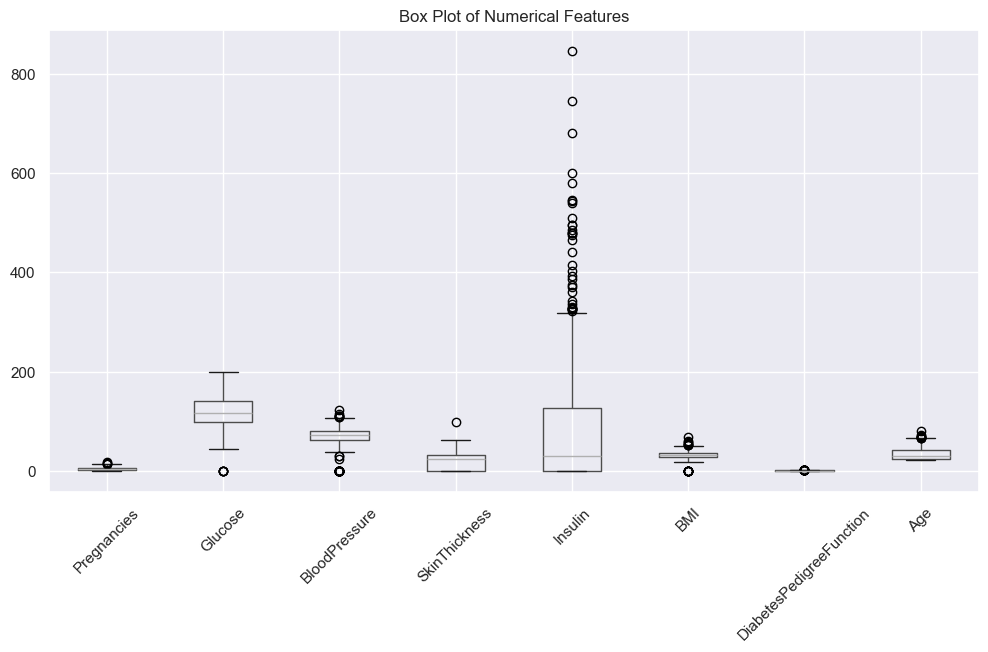

In [24]:
plt.figure(figsize=(12, 6))
data.drop("Outcome", axis=1).boxplot()
plt.title("Box Plot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

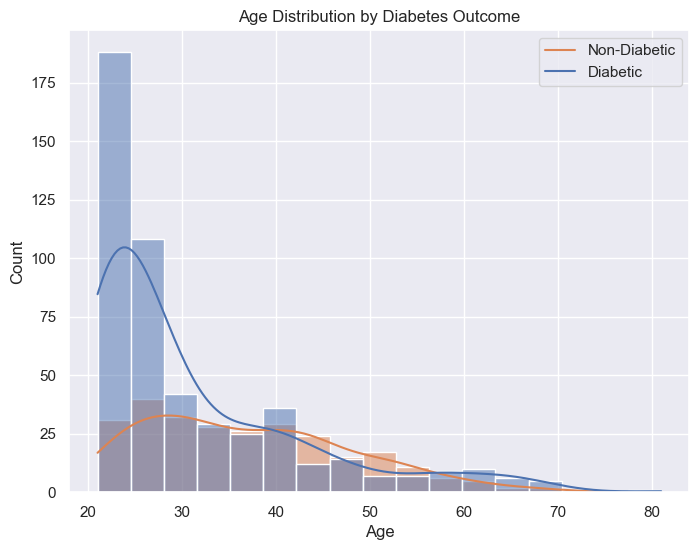

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', hue='Outcome', kde=True)
plt.title("Age Distribution by Diabetes Outcome")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(labels=['Non-Diabetic', 'Diabetic'])
plt.show()

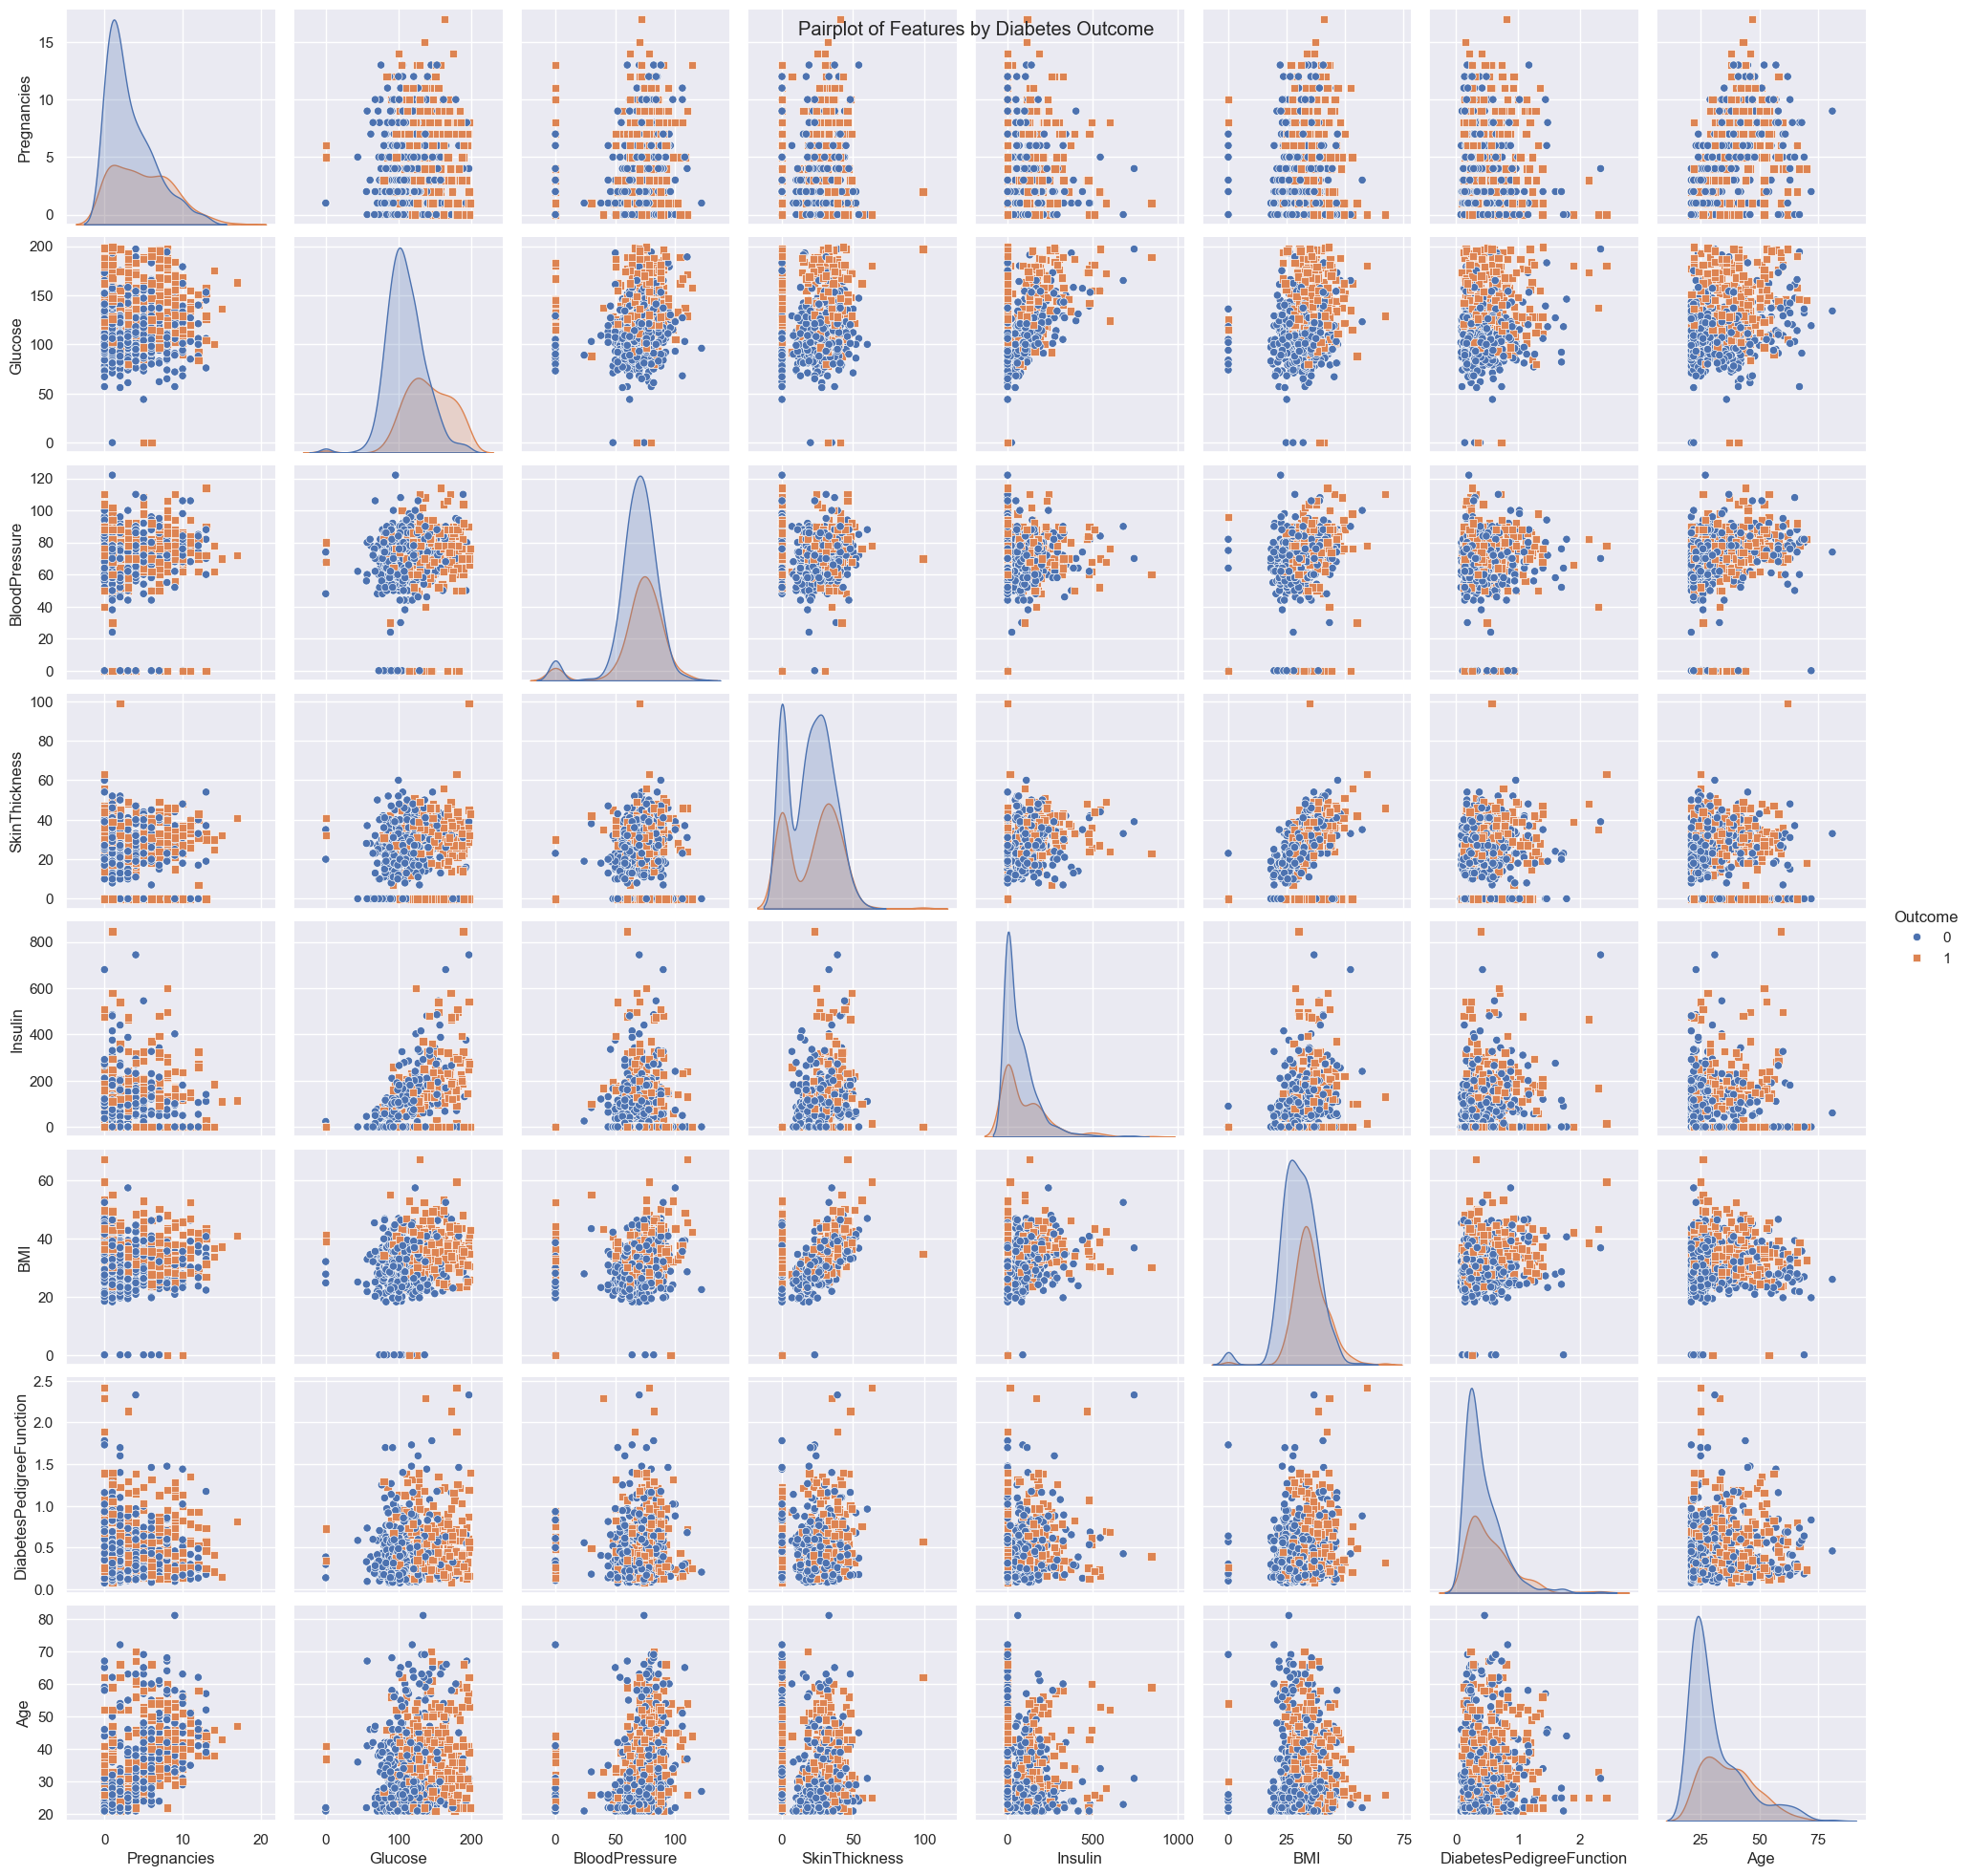

In [29]:
sns.pairplot(data, hue='Outcome', diag_kind='kde', markers=["o", "s"])
plt.suptitle("Pairplot of Features by Diabetes Outcome")
plt.show() 

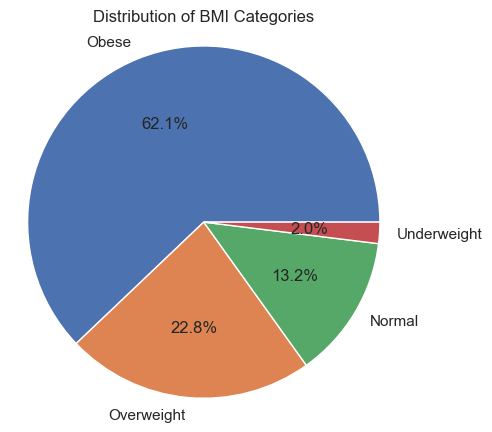

In [31]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal"
    elif 24.9 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"

data['BMI_Category'] = data['BMI'].apply(categorize_bmi)
bmi_category_counts = data['BMI_Category'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(bmi_category_counts, labels=bmi_category_counts.index, autopct='%1.1f%%')
plt.title("Distribution of BMI Categories")
plt.axis('equal')
plt.show()

In [32]:
print(train.shape, test.shape)

(537, 9) (231, 9)


In [33]:
train_pro  = train.copy()
test_pro = test.copy()

In [34]:
print(train_pro.shape, test_pro.shape)

(537, 9) (231, 9)


# Feature Engineering

In [35]:
#getting rid of outiers
#fuction to find outliers using z-score
def find_z_score_outliers(data, threshold=3):
    """
    Find outliers in a dataset using the z-score method.

    Parameters:
    - data: NumPy array or Pandas Series, the dataset to analyze.
    - threshold: Z-score threshold to identify outliers. Default is 3.

    Returns:
    - Array of indices corresponding to the outliers.
    """
    z_scores = np.abs(stats.zscore(data))
    outlier_indices = np.where(z_scores > threshold)
    return outlier_indices[0]


##fuction to get rid of the outliers
def remove_z_score_outliers(data, threshold=3):
    """
    Remove outliers from a dataset using the z-score method.

    Parameters:
    - data: NumPy array or Pandas Series, the dataset from which to remove outliers.
    - threshold: Z-score threshold to identify outliers. Default is 3.

    Returns:
    - Cleaned dataset with outliers removed.
    """
    outlier_indices = find_z_score_outliers(data, threshold)
    cleaned_data = data[~np.isin(np.arange(len(data)), outlier_indices)]
    return cleaned_data

In [36]:
#INSULIN
# Find outliers using the z-score method
outlier_indices = find_z_score_outliers(train['Insulin'])
print("Outlier Indices:", outlier_indices)

# Remove outliers and get the cleaned dataset
train['Insulin'] = remove_z_score_outliers(train['Insulin'])
print("Cleaned Data:", train['Insulin'])



#PREGNANCIES
# Find outliers using the z-score method
outlier_indices_1 = find_z_score_outliers(train['Pregnancies'])
print("Outlier Indices_1:", outlier_indices_1)

# Remove outliers and get the cleaned dataset
train['Pregnancies'] = remove_z_score_outliers(train['Pregnancies'])
print("Cleaned Data_1:", train['Pregnancies'])



#GLUCOSE
# Find outliers using the z-score method
outlier_indices_2 = find_z_score_outliers(train['Glucose'])
print("Outlier Indices_2:", outlier_indices_2)

# Remove outliers and get the cleaned dataset
train['Glucose'] = remove_z_score_outliers(train['Glucose'])
print("Cleaned Data_2:", train['Glucose'])



#BLOODPRESSURE
# Find outliers using the z-score method
outlier_indices_3 = find_z_score_outliers(train['BloodPressure'])
print("Outlier Indices_3:", outlier_indices_3)

# Remove outliers and get the cleaned dataset
train['BloodPressure'] = remove_z_score_outliers(train['BloodPressure'])
print("Cleaned Data_3:", train['BloodPressure'])



#SKINTHICKNESS
# Find outliers using the z-score method
outlier_indices_4 = find_z_score_outliers(train['SkinThickness'])
print("Outlier Indices_4:", outlier_indices_4)

# Remove outliers and get the cleaned dataset
train['SkinThickness'] = remove_z_score_outliers(train['SkinThickness'])
print("Cleaned Data_4:", train['SkinThickness'])




#BMI
# Find outliers using the z-score method
outlier_indices_5 = find_z_score_outliers(train['BMI'])
print("Outlier Indices_5:", outlier_indices_5)

# Remove outliers and get the cleaned dataset
train['BMI'] = remove_z_score_outliers(train['BMI'])
print("Cleaned Data_5:", train['BMI'])




#DIABETESPEDIGREEFUNCTION
#Find outliers using the z-score method
outlier_indices_6 = find_z_score_outliers(train['DiabetesPedigreeFunction'])
print("Outlier Indices_6:", outlier_indices_6)

# Remove outliers and get the cleaned dataset
train['DiabetesPedigreeFunction'] = remove_z_score_outliers(train['DiabetesPedigreeFunction'])
print("Cleaned Data_6:", train['DiabetesPedigreeFunction'])




#AGE
#Find outliers using the z-score method
outlier_indices_7 = find_z_score_outliers(train['Age'])
print("Outlier Indices_7:", outlier_indices_7)

# Remove outliers and get the cleaned dataset
train['DiabetesPedigreeFunction'] = remove_z_score_outliers(train['Age'])
print("Cleaned Data_7:", train['Age'])

Outlier Indices: [  8  13 111 153 186 220 228 247 286 370 409 415 486]
Cleaned Data: 0        0.0
1        0.0
2        0.0
3       94.0
4      168.0
       ...  
532     65.0
533      0.0
534     56.0
535      0.0
536      0.0
Name: Insulin, Length: 537, dtype: float64
Outlier Indices_1: [ 88 159 298 455]
Cleaned Data_1: 0      6.0
1      1.0
2      8.0
3      1.0
4      0.0
      ... 
532    1.0
533    6.0
534    1.0
535    4.0
536    0.0
Name: Pregnancies, Length: 537, dtype: float64
Outlier Indices_2: [ 75 182 342 349 502]
Cleaned Data_2: 0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
532     86.0
533     91.0
534     77.0
535    132.0
536    105.0
Name: Glucose, Length: 537, dtype: float64
Outlier Indices_3: [  7  15  49  60  78  81 172 193 222 261 266 269 300 332 336 347 357 426
 430 435 453 468 484 494 522 533 535]
Cleaned Data_3: 0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
532    66.0
533     NaN
534    56.0
535     NaN

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_41784\976100663.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Insulin'] = remove_z_score_outliers(train['Insulin'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_41784\976100663.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Pregnancies'] = remove_z_score_outliers(train['Pregnancies'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_41784\976100663.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [37]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,533.000000,532.000000,510.000000,537.000000,524.000000,526.000000,534.000000,537.000000,537.000000
mean,3.741088,121.505639,72.109804,20.299814,67.127863,32.238403,32.855805,33.085661,0.351955
std,3.226497,30.508959,12.029095,15.695727,88.587626,6.865506,11.303746,11.688754,0.478025
min,0.000000,44.000000,30.000000,0.000000,0.000000,18.200000,21.000000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.225000,24.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,22.000000,16.000000,32.000000,29.000000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,111.000000,36.575000,39.750000,40.000000,1.000000
max,13.000000,197.000000,122.000000,63.000000,415.000000,55.000000,67.000000,81.000000,1.000000


In [38]:
train.isnull().any()

Pregnancies                  True
Glucose                      True
BloodPressure                True
SkinThickness               False
Insulin                      True
BMI                          True
DiabetesPedigreeFunction     True
Age                         False
Outcome                     False
dtype: bool

In [39]:
train = train.dropna()

In [40]:
train.shape

(481, 9)

In [41]:
train.shape, test.shape

((481, 9), (231, 9))

In [42]:
# Define the bins and labels
bins = [0, 18.5, 24.9, 29.9, np.inf]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

# Use .copy() to ensure you are working with a copy, not a slice
train = train.copy()
test = test.copy()

# Assign the 'BMI_Category' column
train['BMI_Category'] = pd.cut(train['BMI'], bins=bins, labels=labels)
test['BMI_Category'] = pd.cut(test['BMI'], bins=bins, labels=labels)


In [43]:
# Define the bins and labels for age groups
age_bins = [0, 30, 40, 50, np.inf]
age_labels = ['<30', '30-40', '40-50', '50+']

# Use .copy() to ensure you are working with a copy, not a slice
train = train.copy()
test = test.copy()

# Assign the 'Age_Group' column
train['Age_Group'] = pd.cut(train['Age'], bins=age_bins, labels=age_labels)
test['Age_Group'] = pd.cut(test['Age'], bins=age_bins, labels=age_labels)


In [44]:
# Create the interaction feature
train['Glucose_BMI_Interact'] = train['Glucose'] * train['BMI']
test['Glucose_BMI_Interact'] = test['Glucose'] * test['BMI']


In [45]:
# Use .copy() to ensure you are working with a copy, not a slice
train = train.copy()
test = test.copy()

# Adding 1 to avoid log(0)
train['Log_Insulin'] = np.log(train['Insulin'] + 1)
test['Log_Insulin'] = np.log(test['Insulin'] + 1)


In [46]:
from scipy.stats import zscore

train['Glucose_BMI_Interact_trans'] = zscore(train['Glucose_BMI_Interact'])
test['Glucose_BMI_Interact_trans'] = zscore(test['Glucose_BMI_Interact'])


In [47]:
print(train.shape, test.shape)

(481, 14) (231, 14)


In [48]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instance
scaler = StandardScaler()

# Define the columns to standardize
columns_to_standardize = ['Glucose', 'BMI', 'Age']

# Use .copy() to ensure you are working with a copy, not a slice
train = train.copy()
test = test.copy()

# Fit and transform the selected columns in both train and test DataFrames
train[columns_to_standardize] = scaler.fit_transform(train[columns_to_standardize])
test[columns_to_standardize] = scaler.transform(test[columns_to_standardize])


In [49]:
# Define the window size for the rolling mean
window_size = 3

# Use .copy() to ensure you are working with a copy, not a slice
train = train.copy()
test = test.copy()

# Calculate and assign the 'Glucose_Rolling_Mean' column
train['Glucose_Rolling_Mean'] = train['Glucose'].rolling(window=window_size).mean()
test['Glucose_Rolling_Mean'] = test['Glucose'].rolling(window=window_size).mean()


In [50]:
# Use .copy() to ensure you are working with a copy, not a slice
train = train.copy()
test = test.copy()

# Create the 'Pregnancies_Age' feature cross
train['Pregnancies_Age'] = train['Pregnancies'] * train['Age']
test['Pregnancies_Age'] = test['Pregnancies'] * test['Age']


In [51]:
# Use .copy() to ensure you are working with a copy, not a slice
train = train.copy()
test = test.copy()

# Calculate the 'BMI_BP_Ratio' column
train['BMI_BP_Ratio'] = train['BMI'] / train['BloodPressure']
test['BMI_BP_Ratio'] = test['BMI'] / test['BloodPressure']


In [52]:
# Use .copy() to ensure you are working with a copy, not a slice
train = train.copy()
test = test.copy()

# Calculate the Glucose to Insulin ratio
train['Glucose_Insulin_Ratio'] = train['Glucose'] / train['Insulin']
test['Glucose_Insulin_Ratio'] = test['Glucose'] / test['Insulin']


In [53]:
# Create the squared Glucose feature
train['Glucose_Squared'] = train['Glucose'] ** 2
test['Glucose_Squared'] = test['Glucose'] ** 2


In [54]:
print(train.shape, test.shape)

(481, 19) (231, 19)


In [55]:
train.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,Age_Group,Glucose_BMI_Interact,Log_Insulin,Glucose_BMI_Interact_trans,Glucose_Rolling_Mean,Pregnancies_Age,BMI_BP_Ratio,Glucose_Insulin_Ratio,Glucose_Squared
0,6.0,0.937662,72.0,35,0.0,0.231964,50.0,1.497173,1,Obese,40-50,4972.8,0.000000,0.779762,NaN,8.983041,0.003222,inf,0.879210
1,1.0,-1.169262,66.0,29,0.0,-0.799905,31.0,-0.175320,0,Overweight,30-40,2261.0,0.000000,-1.157828,NaN,-0.175320,-0.012120,-inf,1.367173
2,8.0,2.108176,64.0,0,0.0,-1.286357,32.0,-0.087294,1,Normal,30-40,4263.9,0.000000,0.273251,0.625525,-0.698352,-0.020099,inf,4.444405
3,1.0,-1.035489,66.0,23,94.0,-0.578790,21.0,-1.055580,0,Overweight,<30,2500.9,4.553877,-0.986419,-0.032192,-1.055580,-0.008770,-0.011016,1.072237
4,0.0,0.569787,40.0,35,168.0,1.632357,33.0,0.000732,1,Obese,30-40,5904.7,5.129899,1.445608,0.547491,0.000000,0.040809,0.003392,0.324657


In [56]:
#train = train.dropna()
#test = test.dropna()
#print(train.shape, test.shape

In [57]:
train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'BMI_Category',
       'Age_Group', 'Glucose_BMI_Interact', 'Log_Insulin',
       'Glucose_BMI_Interact_trans', 'Glucose_Rolling_Mean', 'Pregnancies_Age',
       'BMI_BP_Ratio', 'Glucose_Insulin_Ratio', 'Glucose_Squared'],
      dtype='object')

In [58]:
categ_cols = []
num_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'Glucose_Insulin_Ratio', 'Glucose_Squared', 'BMI_BP_Ratio',
       'Pregnancies_Age', 'Glucose_BMI_Interact' ]
target = ['Outcome']

In [59]:
print(train.shape,test.shape)
print(train_pro.shape, test_pro.shape)

(481, 19) (231, 19)
(537, 9) (231, 9)


# SAVING TRAINING AND TESTING SET

In [63]:
train.to_csv(r"D:\\DATA ANALYTICS\\Diabetes prediction project\\diabetes.csv", index=False)
test.to_csv(r"D:\\DATA ANALYTICS\\Diabetes prediction project\\diabetes.csv", index=False)
train_pro.to_csv(r"D:\\DATA ANALYTICS\\Diabetes prediction project\\diabetes.csv", index=False)
test_pro.to_csv(r"D:\\DATA ANALYTICS\\Diabetes prediction project\\diabetes.csv", index=False)